In [52]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats
import scipy.signal as sg
import gsw
import matplotlib.pyplot as plt
import pickle

In [12]:
temp = {}
sal = {}
year = 2013

with Dataset(f'../netcdf/{year}/sbe.nc', 'r') as nc:
        
    depths = list(nc['DEPTH'][:])
    #print(nc.variables)
    
    for d in depths:
        d_str = str(d)
        temp[d] = nc[d_str]['TEMP'][:].data
        sal[d] = nc[d_str]['PSAL'][:].data

In [53]:
infile = open('../support_data/depth_corrections','rb')
depth_correction = pickle.load(infile)
infile.close()

In [54]:
depth_correction

{2011: 30.49261474609375,
 2012: 72.3565673828125,
 2013: 6.17608642578125,
 2014: 12.051361083984375,
 2015: 9.3211669921875,
 2016: 10.665374755859375,
 2017: 24.912078857421875,
 2018: 10.07763671875,
 2019: 9.08392333984375}

In [13]:
temp

{1350: array([5.607 , 5.5719, 5.5703, ..., 5.527 , 5.55  , 5.6079], dtype=float32),
 1688: array([4.3995, 4.3871, 4.3871, ..., 4.5911, 4.588 , 4.5942], dtype=float32),
 1000: array([7.8565, 7.8519, 7.8685, ..., 7.9074, 7.8891, 7.8852], dtype=float32)}

In [14]:
sal

{1350: array([35.1599  , 35.148888, 35.15133 , ..., 35.13755 , 35.13735 ,
        35.14171 ], dtype=float32),
 1688: array([35.342625, 35.246445, 35.221752, ..., 35.203293, 35.191948,
        35.19923 ], dtype=float32),
 1000: array([35.25734 , 35.251358, 35.249435, ..., 35.21903 , 35.21901 ,
        35.218628], dtype=float32)}

In [50]:
#lvl = 1350
sigma = {}
sigma_mean = []
sigma_std = []
depths = sorted(depths)

for lvl in depths:
    print(lvl)
    
    sigma[lvl] = gsw.density.sigma2(sal[lvl], temp[lvl])
    sigma_mean.append(sigma[lvl].mean())
    sigma_std.append(sigma[lvl].std())

1000
1350
1688


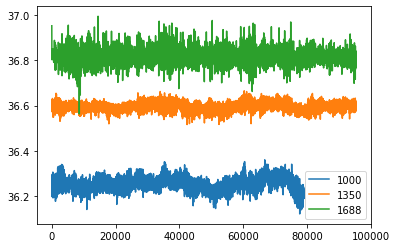

In [51]:
for lvl in depths:
    plt.plot(sigma[lvl], label=lvl)
    
plt.legend()

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


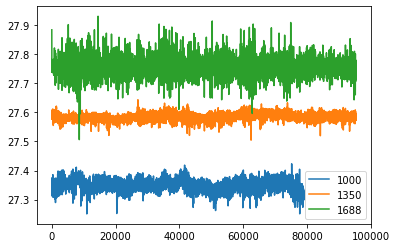

In [47]:
for lvl in depths:
    plt.plot(sigma[lvl], label=lvl)
    
plt.legend()

<ErrorbarContainer object of 3 artists>

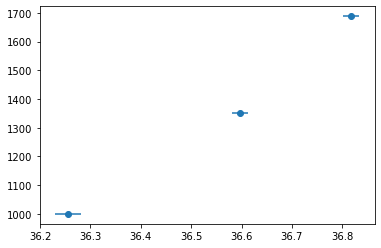

In [55]:
plt.errorbar(sigma_mean, depths, xerr=sigma_std, fmt='o')

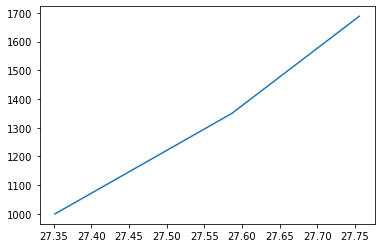

In [34]:
plt.plot(sigma_mean, depths)